<a href="https://colab.research.google.com/github/granantuin/LEVX_regression/blob/master/linear_regre_LEVX_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
drive_metar="/content/drive/My Drive/Colab Notebooks/model_vs_data/Metar_2018/"
dr=[drive_4km,drive_1km,drive_metar]
y_data=pd.read_excel(dr[2]+"y_LEVX_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[2]+"x_LEVX.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)
y_pred=LinearRegression().fit(x_train,y_train).predict(x_test)

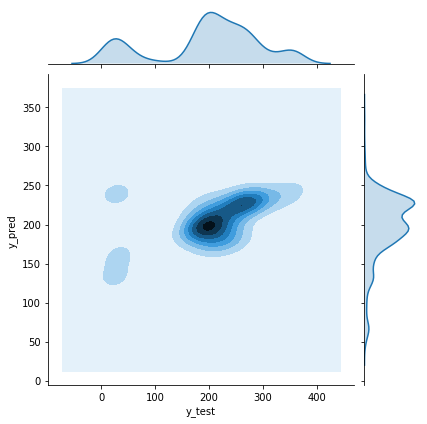

In [81]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,)



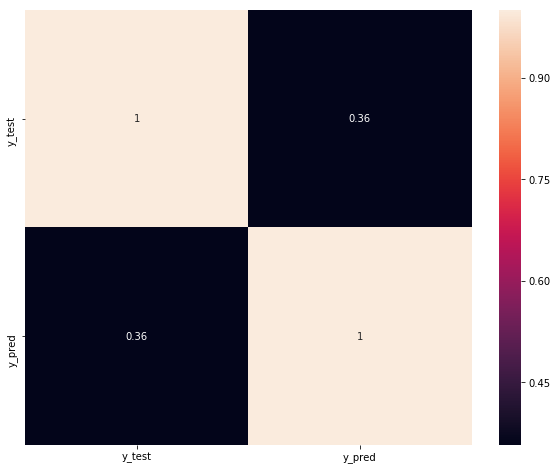

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]

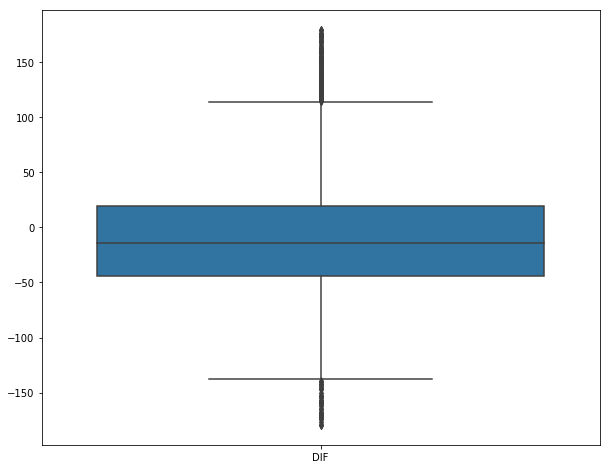

In [84]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])

In [85]:
df2.iloc[:,2:3].describe()

,DIF
count,1835.000000
mean,-6.313577
std,66.246452
min,-179.500288
25%,-44.118473
50%,-14.479764
75%,19.296730
max,179.665238
